
Problem Statement

Air pollution is a pressing environmental and public health issue that affects millions worldwide, contributing to respiratory diseases, cardiovascular problems, and premature mortality.

Despite government regulations and global efforts to reduce air pollution, many urban and industrial areas continue to experience harmful levels of pollutants like particulate matter (PM2.5 and PM10), carbon monoxide (CO), nitrogen dioxide (NO₂), sulfur dioxide (SO₂), and ground-level ozone (O₃).

 Understanding the sources, trends, and impact of these pollutants is essential for policymakers, researchers, and communities to make informed decisions and take effective action.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# data understanding

#This project aims to analyze air quality data to:

Identify Pollution Trends: Track air quality trends over time to determine whether pollution levels are rising or declining.

Pinpoint Main Pollutants and High-Risk Areas: Determine which pollutants are most prevalent in specific regions and identify areas with consistently poor air quality.

Evaluate Influencing Factors: Assess how weather conditions, seasons, and significant events (like wildfires) affect air pollution levels.

Predict Future Air Quality: Develop models to forecast air quality, helping authorities and citizens anticipate periods of high pollution and take preventative measures.

In [ ]:
data=pd.read_csv("/content/city_day.csv")
df=pd.DataFrame(data)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df["AQI_Bucket"].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [ ]:
df.shape

(29531, 16)

In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


# data visualization

<Axes: xlabel='AQI', ylabel='Count'>

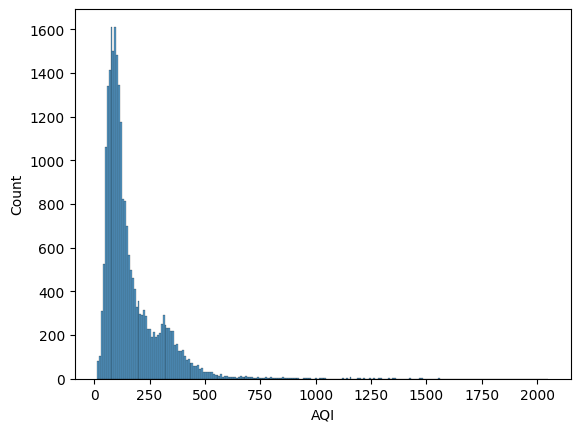

In [ ]:
sns.histplot(df["AQI"])

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'NH3'}>,
        <Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>,
        <Axes: title={'center': 'Xylene'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

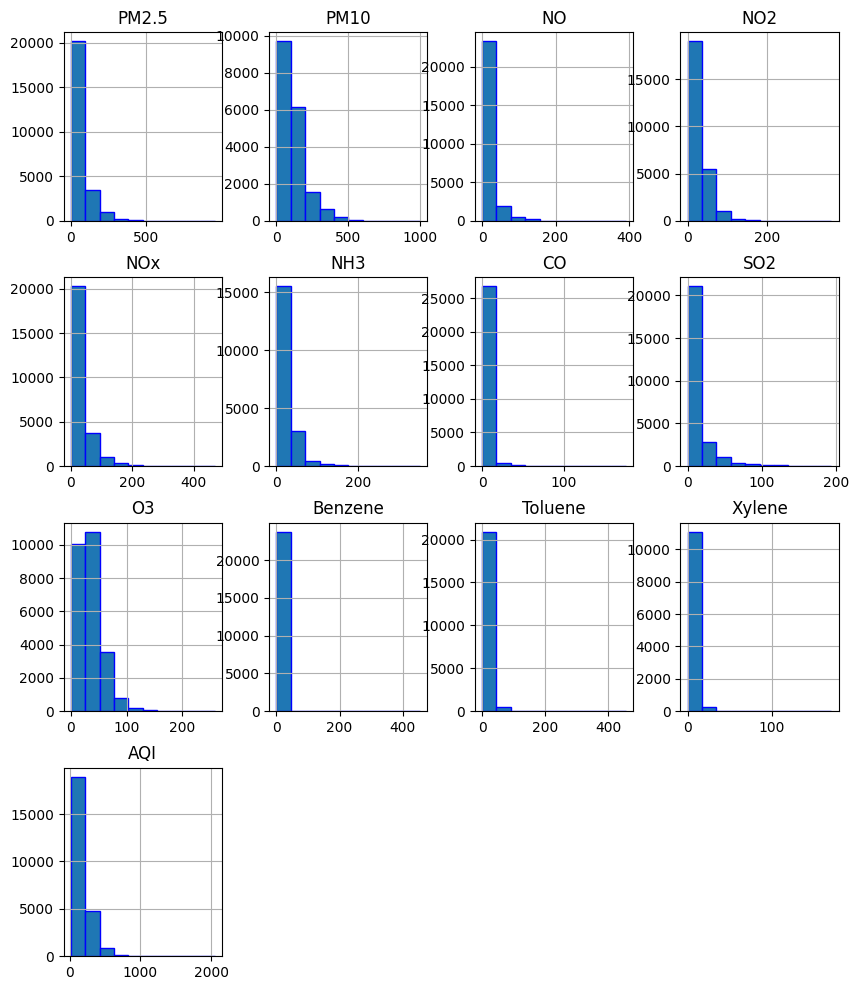

In [ ]:
df.hist(edgecolor="b",figsize=[10,12])

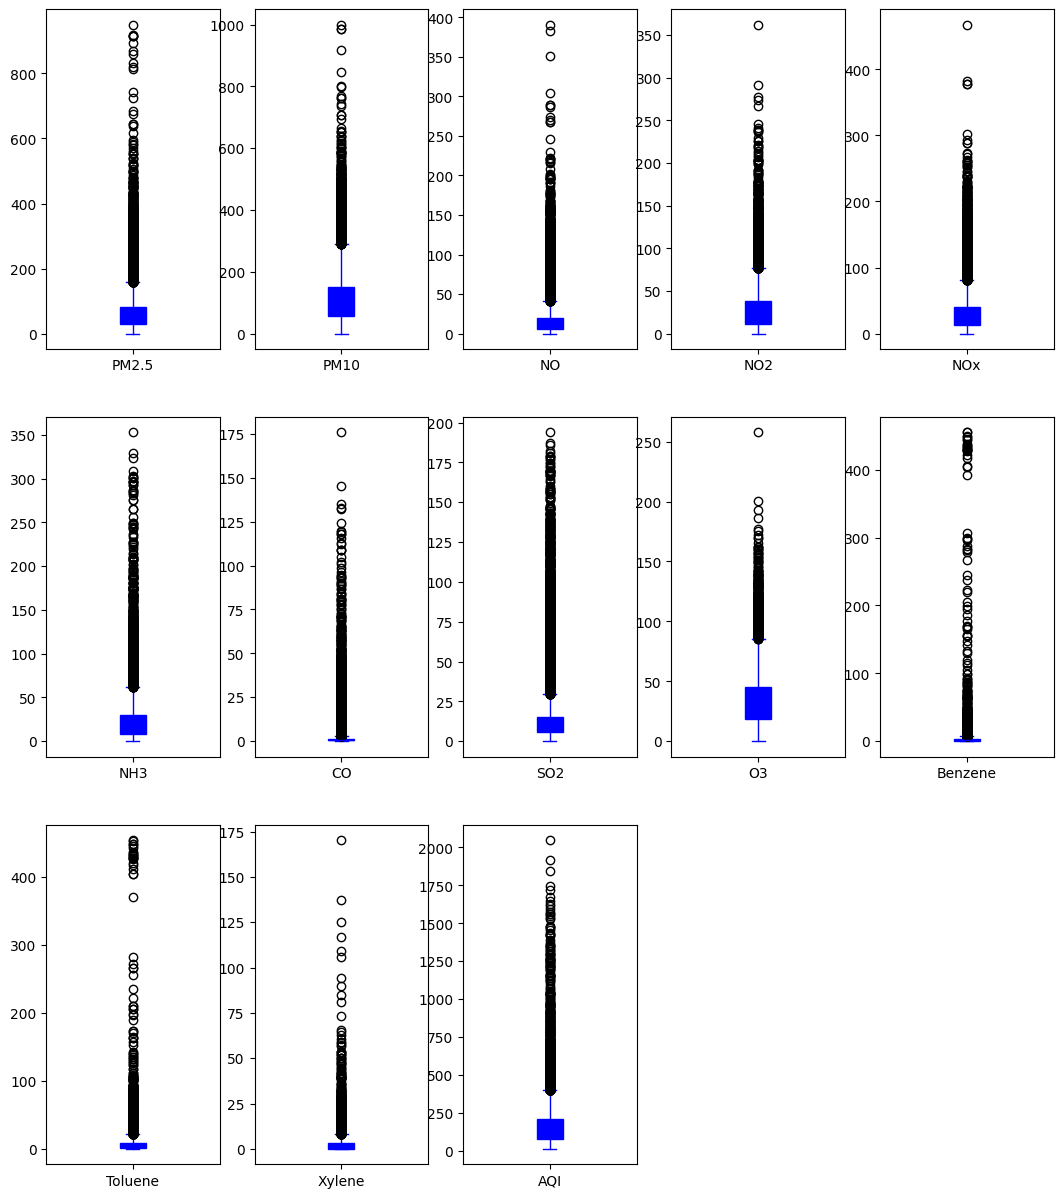

In [ ]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

# data cleaning


In [ ]:
df.drop(["Date"],axis=1,inplace=True)
df.drop(["AQI_Bucket"],axis=1,inplace=True)
df.drop(["Xylene"],axis=1,inplace=True)

In [ ]:
df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
df["PM10"].fillna(df["PM10"].median(),inplace=True)
df["NO"].fillna(df["NO"].median(),inplace=True)
df["NO2"].fillna(df["NO2"].median(),inplace=True)
df["NOx"].fillna(df["NOx"].median(),inplace=True)
df["NH3"].fillna(df["NH3"].median(),inplace=True)
df["CO"].fillna(df["CO"].median(),inplace=True)
df["SO2"].fillna(df["SO2"].median(),inplace=True)
df["O3"].fillna(df["O3"].median(),inplace=True)
df["Benzene"].fillna(df["Benzene"].median(),inplace=True)
df["Toluene"].fillna(df["Toluene"].median(),inplace=True)
df["AQI"].fillna(df["AQI"].median(),inplace=True)


<ipython-input-15-030e213fba53>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
<ipython-input-15-030e213fba53>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'NOx'}>,
        <Axes: title={'center': 'NH3'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>,
        <Axes: title={'center': 'O3'}>],
       [<Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>,
        <Axes: title={'center': 'AQI'}>]], dtype=object)

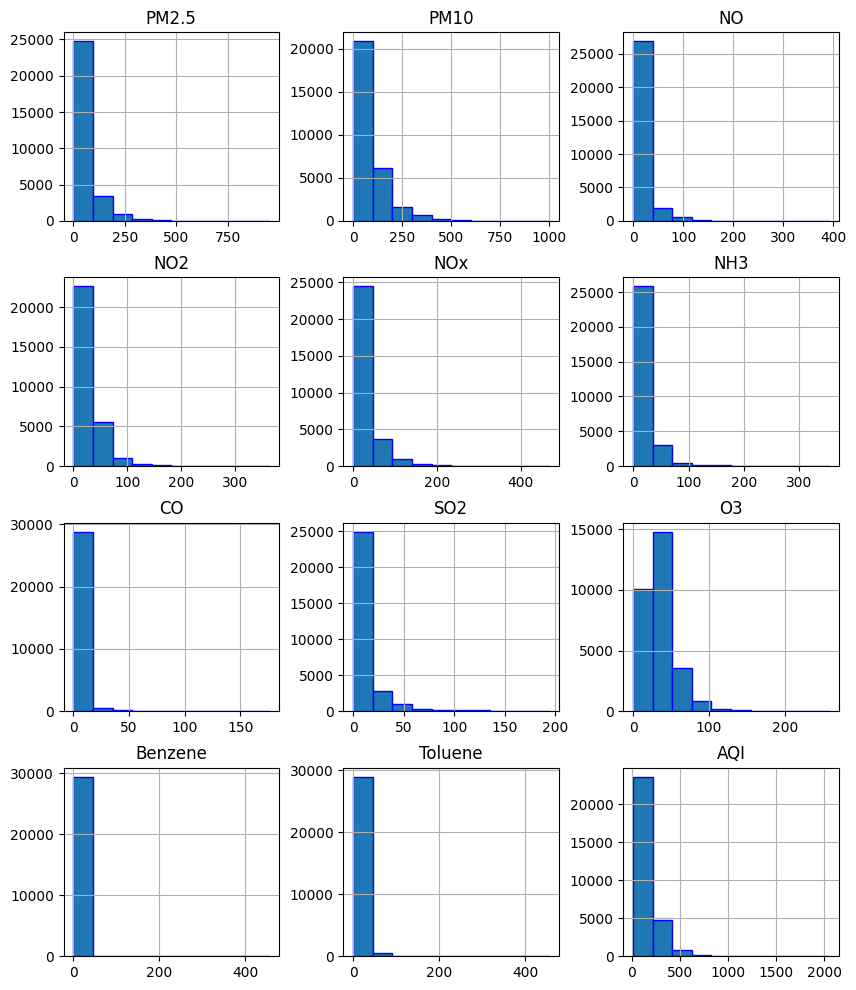

In [ ]:
df.hist(edgecolor="b",figsize=[10,12])

<Axes: xlabel='AQI', ylabel='Count'>

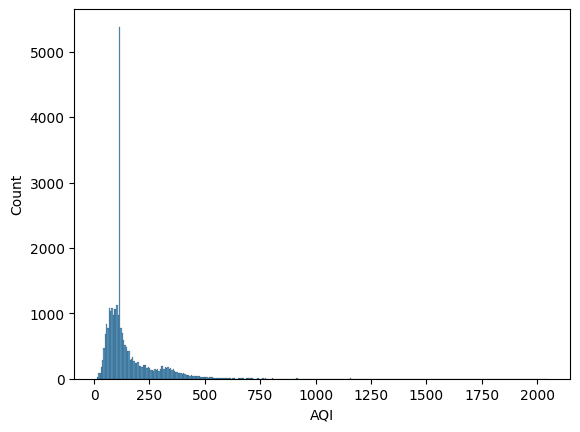

In [ ]:
sns.histplot(df["AQI"])

In [ ]:
df.isnull().sum()

,0
City,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0


In [ ]:
df.duplicated().sum()

2299

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(27232, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27232 entries, 0 to 29530
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     27232 non-null  object 
 1   PM2.5    27232 non-null  float64
 2   PM10     27232 non-null  float64
 3   NO       27232 non-null  float64
 4   NO2      27232 non-null  float64
 5   NOx      27232 non-null  float64
 6   NH3      27232 non-null  float64
 7   CO       27232 non-null  float64
 8   SO2      27232 non-null  float64
 9   O3       27232 non-null  float64
 10  Benzene  27232 non-null  float64
 11  Toluene  27232 non-null  float64
 12  AQI      27232 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.9+ MB


In [ ]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

df["City"]=labelencoder.fit_transform(df['City'])

In [ ]:
df["City"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0
1,0,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0
2,0,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0
3,0,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0
4,0,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0
29527,25,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0
29528,25,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0
29529,25,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0


# outlier

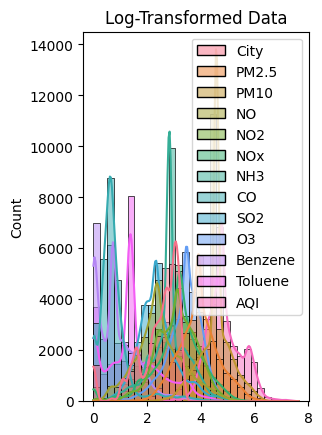

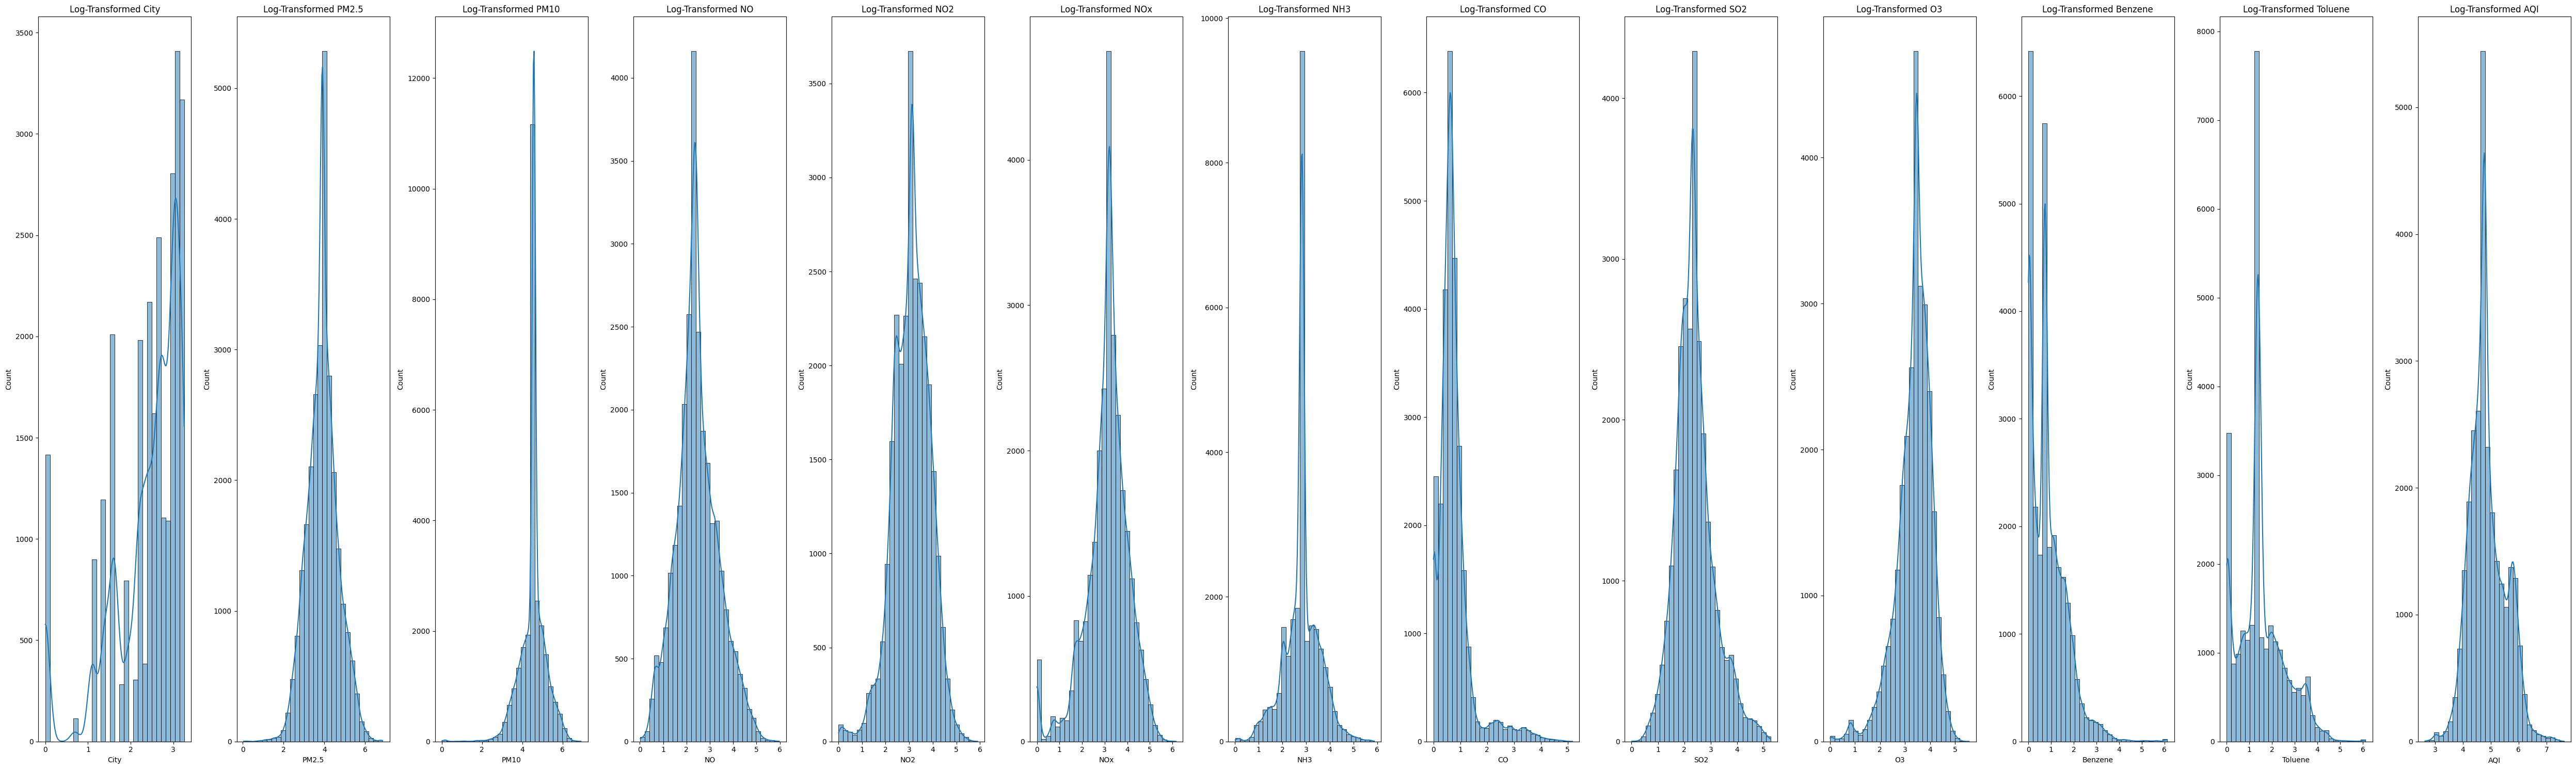

In [ ]:
#  To handle skewness
import numpy as np
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers_iqr(log_data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = log_data[column].quantile(0.25)
    Q3 = log_data[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5  * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers from the DataFrame
    log_data_filtered = log_data[(log_data[column] >= lower_bound) & (log_data[column] <= upper_bound)]
    return log_data_filtered
for i in ["PM2.5","PM10","NOx","NO2","CO","SO2",'NO','NH3','O3','Benzene','Toluene','AQI']:
    log_data = remove_outliers_iqr(log_data, i)

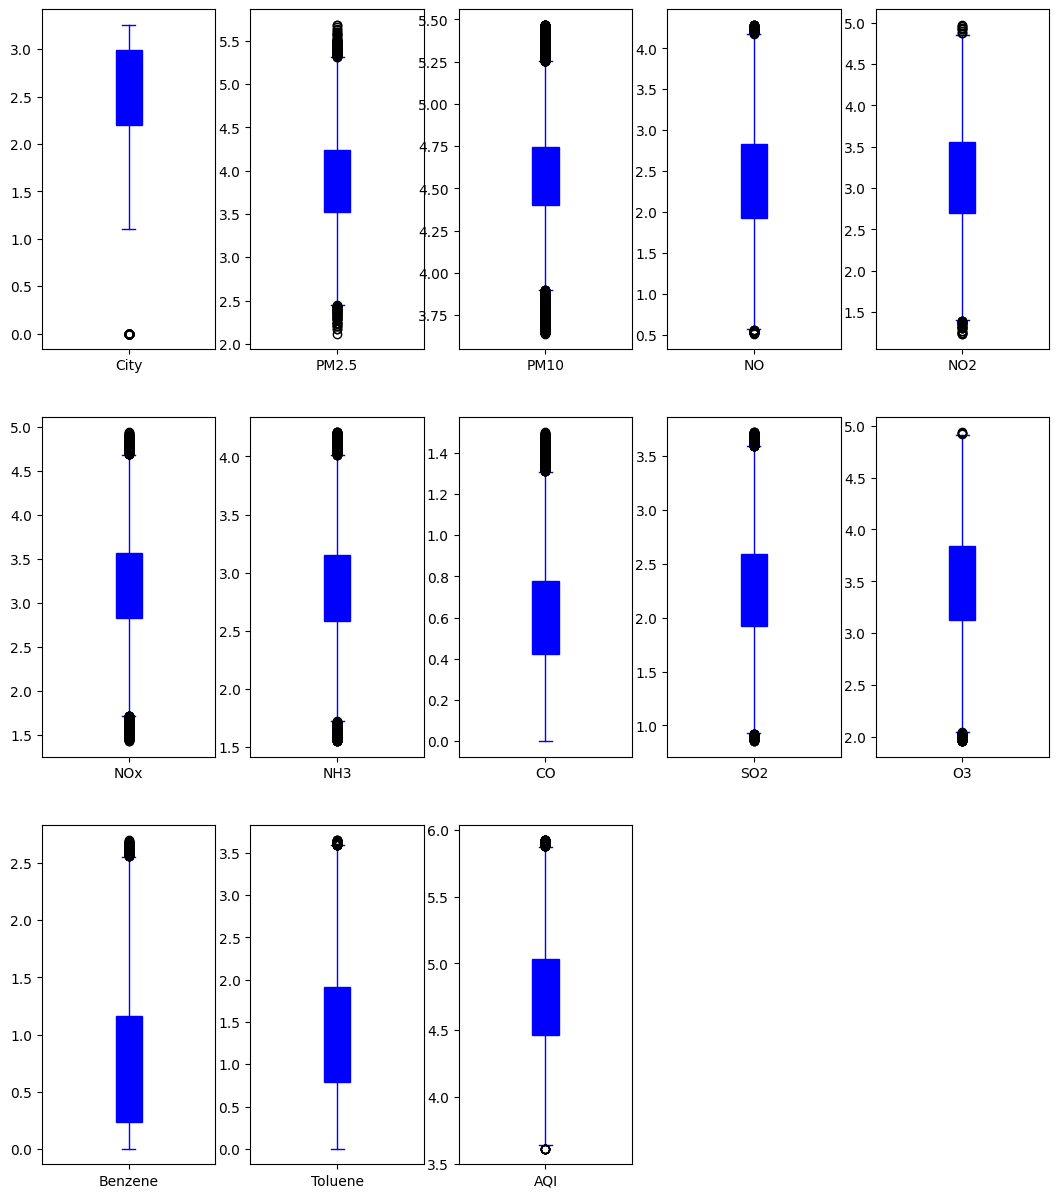

In [ ]:
log_data.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

In [ ]:
df=log_data

# Correlation

In [ ]:
correlation=df.corr()

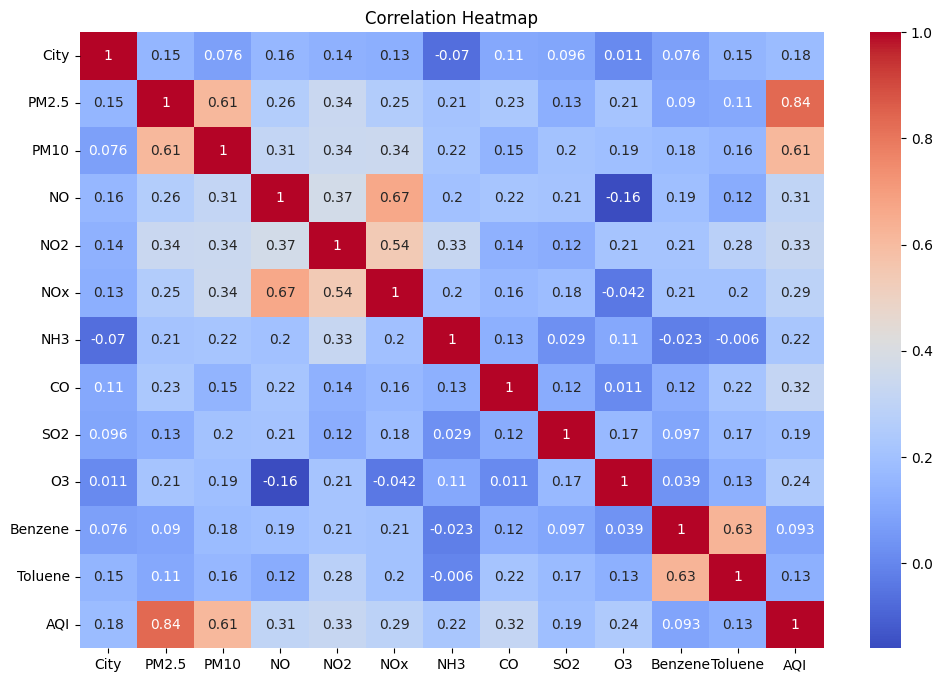

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.corr()['AQI']

,AQI
City,0.176585
PM2.5,0.835500
PM10,0.614634
NO,0.305687
NO2,0.328801
NOx,0.289699
NH3,0.224410
CO,0.315929
SO2,0.192500
O3,0.244800


In [ ]:
df.drop(["City"],inplace=True,axis=1)
df.drop(["NO"],inplace=True,axis=1)
df.drop(["Benzene"],inplace=True,axis=1)
df.drop(["NH3"],inplace=True,axis=1)#Correlation with target variabl eis very low
df.drop(["Toluene"],inplace=True,axis=1)#skewness
df.drop(["O3"],inplace=True,axis=1)#Low correlation
#df.drop(["PM10"],inplace=True,axis=1)
#df.drop(["NOx"],inplace=True,axis=1)

#df.drop(["CO"],inplace=True,axis=1)#High Skewness
#6df.drop(["SO2"],inplace=True,axis=1)

In [ ]:
df.columns

Index(['PM2.5', 'PM10', 'NO2', 'NOx', 'CO', 'SO2', 'AQI'], dtype='object')

In [ ]:
#sns.boxplot(df["Benzene"])

In [ ]:
#df.Benzene.unique().sum()

In [ ]:
Q1=np.quantile(df, 0.25)
Q2=np.quantile(df, 0.50)
Q3=np.quantile(df, 0.75)
Q1, Q2, Q3

(2.318458442150336, 3.408834808791367, 4.406719247264253)

In [ ]:
IQR = Q3 - Q1
IQR

2.0882608051139173

In [ ]:
def remove_outliers_iqr(log_data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = log_data[column].quantile(0.25)
    Q3 = log_data[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5  * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers from the DataFrame
    log_data_filtered = log_data[(log_data[column] >= lower_bound) & (log_data[column] <= upper_bound)]
    return log_data_filtered
for i in ["PM2.5","PM10","NOx","NO2","CO","SO2"]:
    log_data = remove_outliers_iqr(log_data, i)

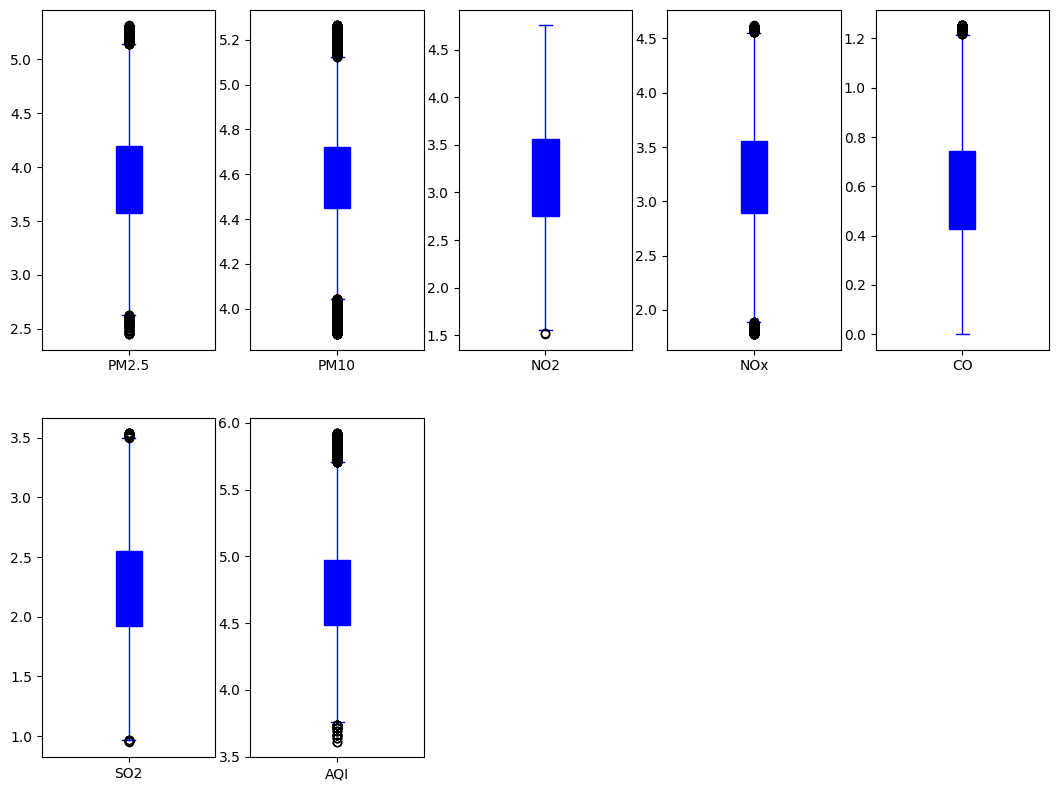

In [ ]:
log_data.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

In [ ]:
log_data.shape

(13472, 7)

In [ ]:
#df["Benzene"].shape

In [ ]:
log_data

,PM2.5,PM10,NO2,NOx,CO,SO2,AQI
0,3.903386,4.571407,2.955951,2.898671,0.652325,3.354804,4.779123
1,3.903386,4.571407,2.814810,2.859913,0.678034,3.240637,4.779123
3,3.903386,4.571407,2.969388,2.942859,0.993252,2.975019,4.779123
34,4.402442,4.571407,3.170945,3.218876,1.214913,3.285787,5.686975
55,3.988799,4.571407,2.437990,2.432736,1.172482,3.519277,5.680173
...,...,...,...,...,...,...,...
29524,2.670694,4.086648,3.117950,2.645465,0.343590,2.218116,4.356709
29526,2.773838,3.950089,3.260402,3.022374,0.385262,2.256541,3.737670
29527,3.233961,4.318687,3.298057,2.863914,0.418710,2.618855,4.262680
29528,3.174297,4.200655,3.418710,2.961658,0.392042,2.242835,4.234107


In [ ]:
log_data.corr()

,PM2.5,PM10,NO2,NOx,CO,SO2,AQI
PM2.5,1.000000,0.541837,0.299845,0.226710,0.174518,0.071416,0.815944
PM10,0.541837,1.000000,0.297530,0.281724,0.074647,0.170348,0.544166
NO2,0.299845,0.297530,1.000000,0.535714,0.160744,0.119715,0.287453
NOx,0.226710,0.281724,0.535714,1.000000,0.246342,0.189467,0.272929
CO,0.174518,0.074647,0.160744,0.246342,1.000000,0.085742,0.248286
SO2,0.071416,0.170348,0.119715,0.189467,0.085742,1.000000,0.155069
AQI,0.815944,0.544166,0.287453,0.272929,0.248286,0.155069,1.000000


In [ ]:
log_data.shape

(13472, 7)

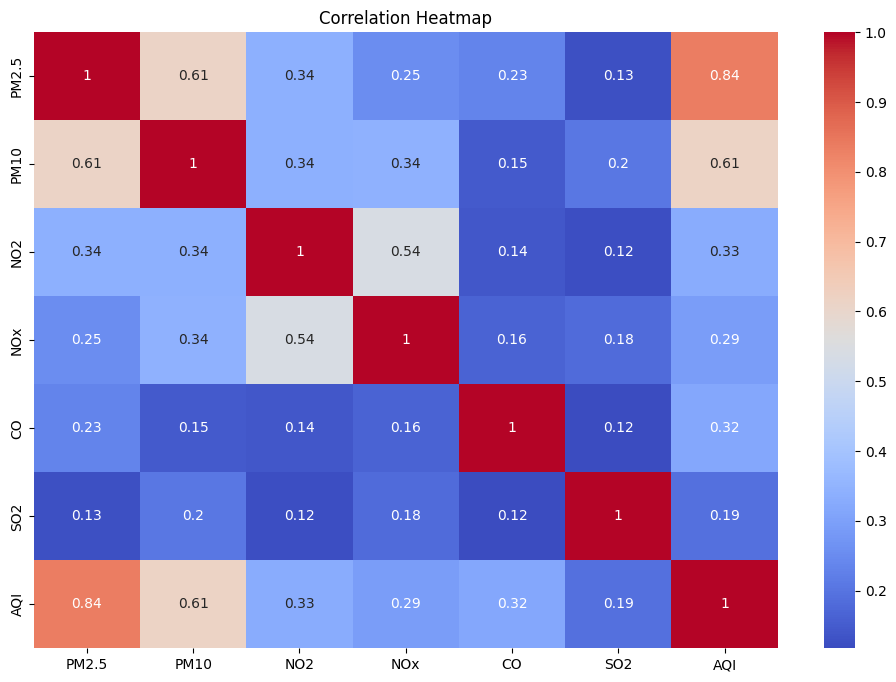

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
x=log_data[["PM2.5","PM10","NO2","NOx","CO","SO2"]]
y=log_data["AQI"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = log_data[["PM2.5","PM10","NO2","NOx","CO","SO2","AQI"]]
#std = StandardScaler()

In [ ]:
"""scaled_X =std.fit_transform(features)
scaled_X
x = scaled_X[:, :-1]  # All columns except the last
y = scaled_X[:, -1]  # Last column (AQI)"""

'scaled_X =std.fit_transform(features)\nscaled_X\nx = scaled_X[:, :-1]  # All columns except the last\ny = scaled_X[:, -1]  # Last column (AQI)'

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(10777, 6)

In [ ]:
x_test.shape

(2695, 6)

In [ ]:
# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

In [ ]:
# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
# Dictionary to store the results
results = {}

In [ ]:
# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes

In [ ]:

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([5.39052842, 4.1011128 , 4.924911  , ..., 4.49849629, 4.81851747,
       4.21488089])

In [ ]:
df

,PM2.5,PM10,NO2,NOx,CO,SO2,AQI
0,3.903386,4.571407,2.955951,2.898671,0.652325,3.354804,4.779123
1,3.903386,4.571407,2.814810,2.859913,0.678034,3.240637,4.779123
3,3.903386,4.571407,2.969388,2.942859,0.993252,2.975019,4.779123
15,3.903386,4.571407,3.123246,3.172203,0.966984,3.670461,4.779123
23,3.903386,4.571407,3.062924,3.109061,1.108563,3.715278,4.779123
...,...,...,...,...,...,...,...
29524,2.670694,4.086648,3.117950,2.645465,0.343590,2.218116,4.356709
29526,2.773838,3.950089,3.260402,3.022374,0.385262,2.256541,3.737670
29527,3.233961,4.318687,3.298057,2.863914,0.418710,2.618855,4.262680
29528,3.174297,4.200655,3.418710,2.961658,0.392042,2.242835,4.234107


In [ ]:
log_data

,PM2.5,PM10,NO2,NOx,CO,SO2,AQI
0,3.903386,4.571407,2.955951,2.898671,0.652325,3.354804,4.779123
1,3.903386,4.571407,2.814810,2.859913,0.678034,3.240637,4.779123
3,3.903386,4.571407,2.969388,2.942859,0.993252,2.975019,4.779123
34,4.402442,4.571407,3.170945,3.218876,1.214913,3.285787,5.686975
55,3.988799,4.571407,2.437990,2.432736,1.172482,3.519277,5.680173
...,...,...,...,...,...,...,...
29524,2.670694,4.086648,3.117950,2.645465,0.343590,2.218116,4.356709
29526,2.773838,3.950089,3.260402,3.022374,0.385262,2.256541,3.737670
29527,3.233961,4.318687,3.298057,2.863914,0.418710,2.618855,4.262680
29528,3.174297,4.200655,3.418710,2.961658,0.392042,2.242835,4.234107


Text(0, 0.5, 'Actual AQI')

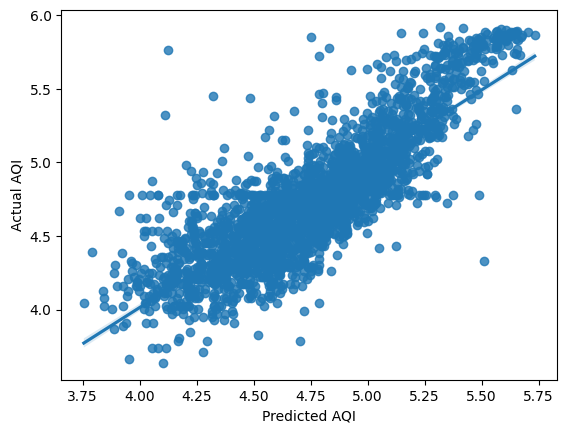

In [ ]:
sns.regplot(x=y_pred,y=y_test)
plt.xlabel("Predicted AQI")
plt.ylabel("Actual AQI")

In [ ]:
mean_squared_error(y_test,y_pred)

0.05366347626225901

In [ ]:
root_mean_squared_error=np.sqrt(mean_squared_error(y_test,y_pred))
root_mean_squared_error

0.23165378533980188

In [ ]:
r2_score(y_test,y_pred)

0.6928093602691129

In [ ]:
mean_absolute_error(y_test,y_pred)

0.1761186726237953

In [ ]:
PM2=float(input("Enter PM2.5: "))
PM10=float(input("Enter PM10: "))
NO2=float(input("Enter NO2: "))
NOx=float(input("Enter NOx: "))
CO=float(input("Enter CO: "))
SO2=float(input("Enter SO2: "))
user_input=[[PM2,PM10,NO2,NOx,CO,SO2]]
#scaled_user_input=std.fit_transform(user_input)
AQI=model.predict(user_input)
print("AQI: ",AQI)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-66-cae1601f7969>", line 1, in <cell line: 1>
    PM2=float(input("Enter PM2.5: "))
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 851, in raw_input
    return self._input_request(str(prompt),
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 895, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of th

TypeError: object of type 'NoneType' has no len()

Creating a project and documentation on air quality data involves several key steps, from gathering and preparing the data to analyzing, visualizing, and reporting your findings. Below is a suggested outline for your project and the corresponding documentation:

1. Project Overview

Objective: Analyze air quality data to understand pollution trends, identify main pollutants, and evaluate air quality over time and across different locations.

Key Questions:
What are the trends in air pollution over time?
Which pollutants contribute most to poor air quality?

2. Data Collection

Source: Use reputable sources like the Environmental Protection Agency (EPA), World Health Organization (WHO), or government databases.
Types of Data:
Air Pollutants: PM2.5, PM10, CO, NO₂, O₃, SO₂, etc.
Location Data: Cities or regions where data was collected.
Time Data: Hourly, daily, or yearly air quality measurements.
Weather Data (optional): Temperature, humidity, and wind speed can influence air quality.
Data Format: Download data in CSV, Excel, or through an API if available.
3. Data Cleaning and Preprocessing

Handling Missing Data: Fill or drop missing values based on the context (e.g., interpolation for time series data).
Normalization/Standardization: For better comparison across regions with varying pollutant levels.
Date Parsing: Ensure dates are in a consistent format, and add useful time-based features (e.g., month, season).
Encoding Categorical Data: Encode regions or city names if needed for analysis.
4. Exploratory Data Analysis (EDA)

Summary Statistics: Calculate averages, medians, and other statistics for each pollutant.
Trends Over Time: Create line plots for pollutants across time to observe trends.
Pollutant Comparison: Use bar charts to compare average pollutant levels by city, region, or country.
Correlation Analysis: Check for correlations between pollutants and weather conditions.
Air Quality Index (AQI): If applicable, convert pollutant levels into AQI values to simplify air quality interpretation.
5. Data Visualization

Line Charts: Show trends in pollutant levels over time.
Heatmaps: Visualize pollutant levels across different regions.
Box Plots: Display pollutant distribution and detect outliers by city/region.
Scatter Plots: Show relationships between weather conditions and pollutant levels.
Geographical Maps (e.g., using folium or plotly): Display air quality data on a map for spatial analysis.
6. Modeling (Optional)

Time Series Forecasting: Use models like ARIMA, SARIMA, or Prophet to predict future air quality.
Machine Learning Models: Build models to classify AQI levels (Good, Moderate, Unhealthy, etc.) based on pollutant data.
Regression Analysis: Predict specific pollutant concentrations using weather and other factors.
7. Conclusions and Recommendations

Key Findings: Summarize insights on air quality trends, major pollutants, seasonal effects, and high-risk areas.
Recommendations: Suggest actions for improving air quality, such as reducing emissions or implementing green spaces.
Limitations: Discuss any data or methodology limitations, such as incomplete data or seasonal biases.
8. Documentation

Introduction: Explain the purpose and scope of the project.
Dataset Description:
Data sources and description of columns (e.g., pollutant name, levels, date, location).
Any data transformations applied.
Methodology:
Steps taken to clean, preprocess, and analyze the data.

Appendix:

Any additional data sources, links, or references used.
Instructions for running the code if you’re sharing it in a repository.
Tools and Libraries
Python Libraries: pandas, numpy for data manipulation; matplotlib, seaborn, plotly for visualization; sklearn for machine learning;


Mapping Libraries: folium or geopandas for geospatial analysis.

Environment: Jupyter Notebook for easy exploration and documentation.